In [1]:
import pandas as pd
import matplotlib.pyplot as plt

--2023-11-15 18:37:52--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.2'

     0K                                                       100% 5.54M=0s

2023-11-15 18:37:53 (5.54 MB/s) - 'grades.csv.2' saved [322/322]

C:\Users\Admin\AppData\Local\Temp\ipykernel_14264\1170568745.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Maximum:97.00
Mean:49.18
Median:49.50
Mode:50.00


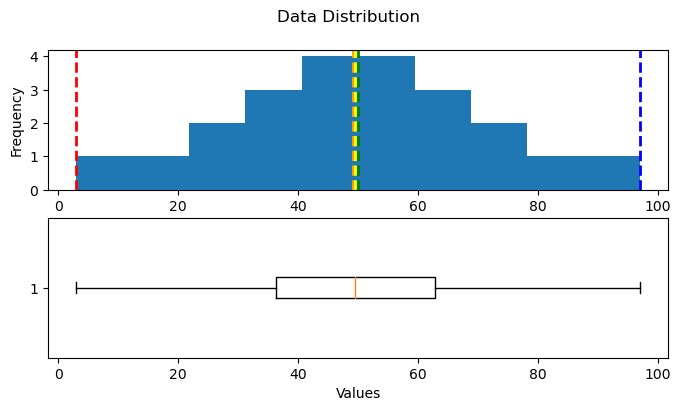

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv

df_students = pd.read_csv('grades.csv')

df_students = df_students.dropna(axis=0,how='any')

passes = pd.Series(df_students['Grade']>=60)

df_students = pd.concat([df_students,passes.rename('Pass')],axis=1)

print(df_students)

def show_distribution(var_data):
    """This function will create a distribution curve and graph it"""

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}'.format(min_val,max_val,mean_val,median_val,mode_val))

    fig,ax = plt.subplots(2,1,figsize=(8,4))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val,color='red',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=max_val,color='blue',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mean_val,color='orange',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=median_val,color='yellow',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mode_val,color='green',linestyle='dashed',linewidth=2)

    ax[1].boxplot(var_data,vert=False)
    ax[1].set_xlabel('Values')

    fig.suptitle('Data Distribution')

    fig.show()

show_distribution(df_students.Grade)

Minimum:1.00
Maximum:16.00
Mean:10.52
Median:10.00
Mode:9.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_14264\1170568745.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


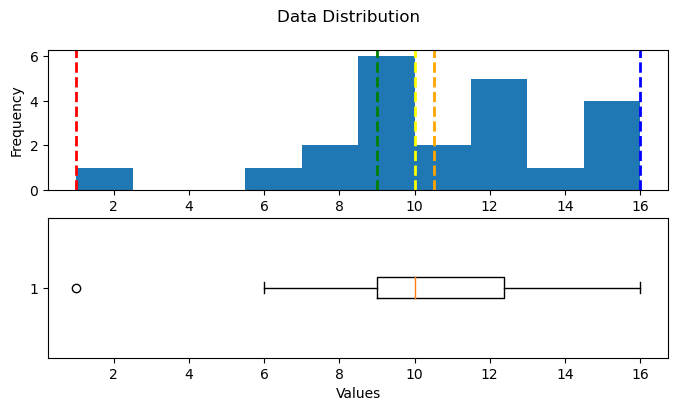

In [3]:
col = df_students['StudyHours']

show_distribution(col)

In [4]:
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


Minimum:6.00
Maximum:16.00
Mean:10.98
Median:10.00
Mode:9.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_14264\1170568745.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


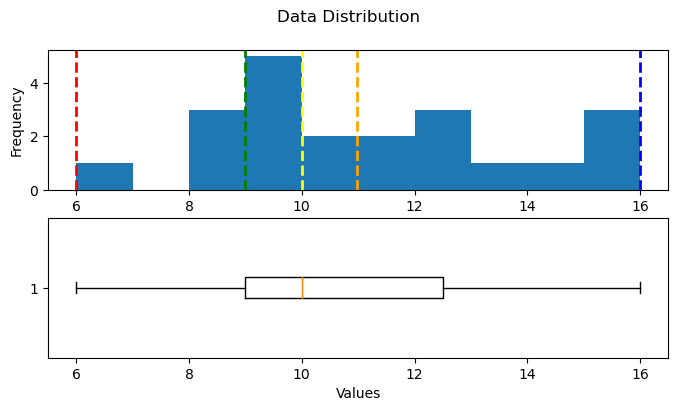

In [5]:
cols = df_students[df_students.StudyHours>1]['StudyHours']

show_distribution(cols)

Minimum:6.00
Maximum:16.00
Mean:10.98
Median:10.00
Mode:9.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_14264\1170568745.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


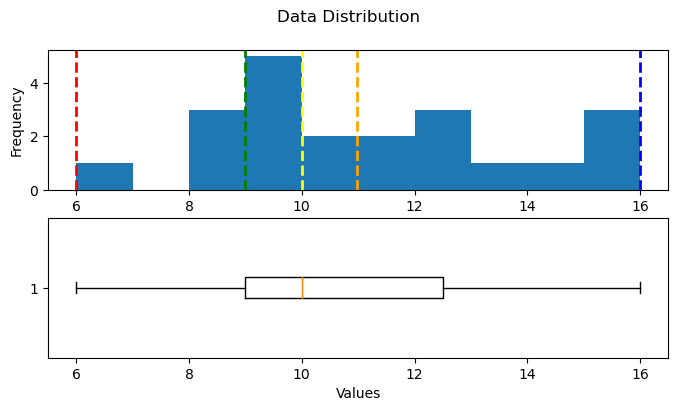

In [6]:
q01 = df_students.StudyHours.quantile(0.01)

col2 = df_students[df_students.StudyHours>q01]['StudyHours']

show_distribution(col2)


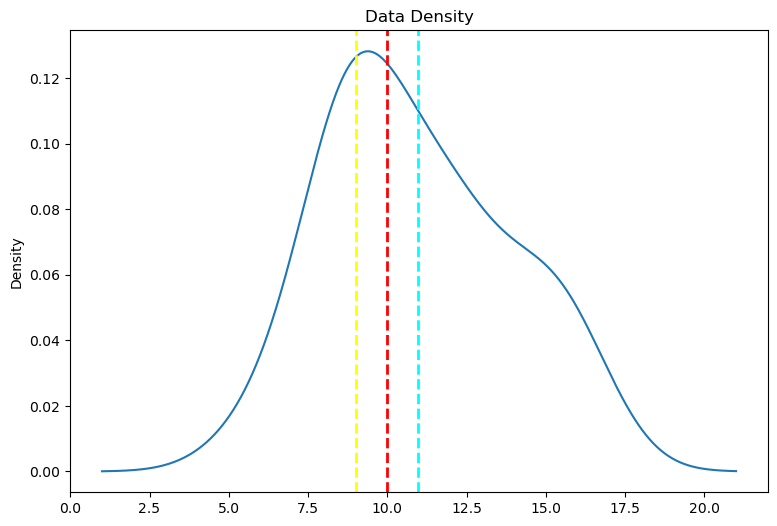

In [7]:
def show_density(var_data):

    fig = plt.figure(figsize=(9,6))

    var_data.plot.density()

    plt.title('Data Density')

    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

show_density(col2)

In [8]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max()-col.min()
    var = col.var()
    std = col.std()

    print('\n{}:\n-Range:{:.2f}\n - Variance:{:.2f}\n-Std.Dev:{:.2f}'.format(col_name,rng,var,std))




Grade:
-Range:94.00
 - Variance:472.54
-Std.Dev:21.74

StudyHours:
-Range:15.00
 - Variance:12.16
-Std.Dev:3.49


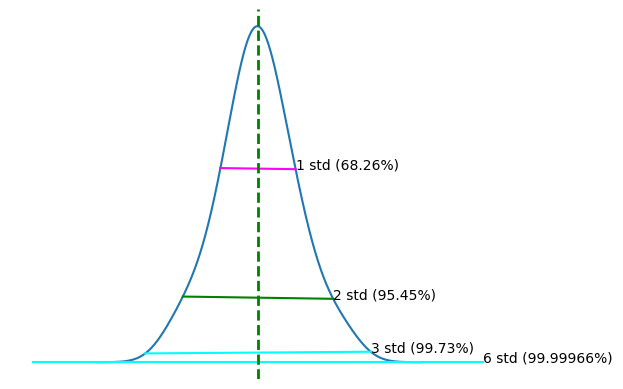

In [9]:
import scipy.stats as stats

col = df_students.Grade

density = stats.gaussian_kde(col)

col.plot.density()

s = col.std()
m = col.mean()

# Annotate 1 stddev

x1 = [m-s,m+s]
y1 = density(x1)
plt.plot(x1,y1,color='magenta')
plt.annotate('1 std (68.26%)',(x1[1],y1[1]))

# Annotate 2 stddev

x2 = [m-(s*2),m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2,color='green')
plt.annotate('2 std (95.45%)',(x2[1],y2[1]))


# Annotate 3 stddev

x3 = [m-(s*3),m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3,color='cyan')
plt.annotate('3 std (99.73%)',(x3[1],y3[1]))

#sixth sigma
# Annotate 6 stddev

x6 = [m-(s*6),m+(s*6)]
y6 = density(x6)
plt.plot(x6,y6,color='cyan')
plt.annotate('6 std (99.99966%)',(x6[1],y6[1]))

#Show mean position

plt.axvline(col.mean(),color='green',linestyle='dashed',linewidth=2)

plt.axis('off')

plt.show()

In [10]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [11]:
df_sample = df_students[df_students.StudyHours>1]

df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


### Comparing numeric and categorical variables

The data includes two *numeric* variables (**StudyHours** and **Grade**) and two *categorical* variables (**Name** and **Pass**). Let's start by comparing the numeric **StudyHours** column to the categorical **Pass** column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

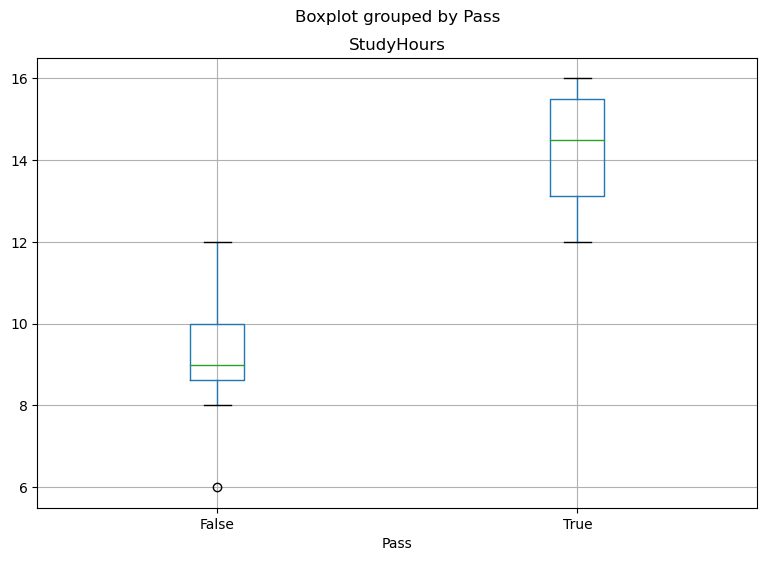

In [12]:
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(9,6))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive indicator.

### Comparing numeric variables

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

<AxesSubplot:xlabel='Name'>

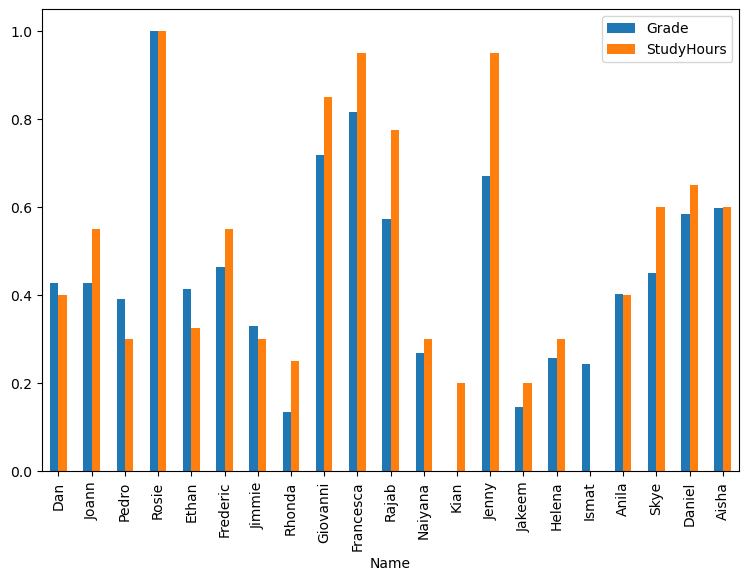

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

#Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(9,6))

In [14]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

Another way to visualize the apparent correlation between two numeric columns is to use a *scatter* plot.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


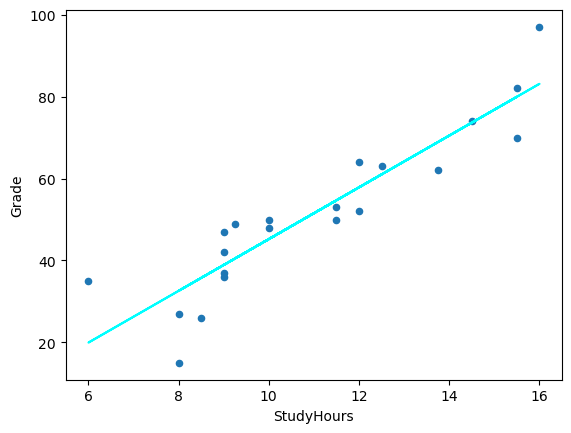

In [15]:
from scipy import stats

df_regression = df_sample[['StudyHours','Grade']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [16]:
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


### Using the regression coefficients for prediction

Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [17]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


So by applying statistics to sample data, you've determined a relationship between study time and grade and encapsulated that relationship in a general function that can be used to predict a grade for a given amount of study time.